In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("Customers.csv")

In [28]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [29]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [31]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [32]:
df["Profession"].fillna(method="ffill",inplace=True)

In [33]:
df["Profession"].isnull().sum()

0

In [34]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [35]:
test_df = df["Annual Income ($)"]
test_df

0        15000
1        35000
2        86000
3        59000
4        38000
         ...  
1995    184387
1996     73158
1997     90961
1998    182109
1999    110610
Name: Annual Income ($), Length: 2000, dtype: int64

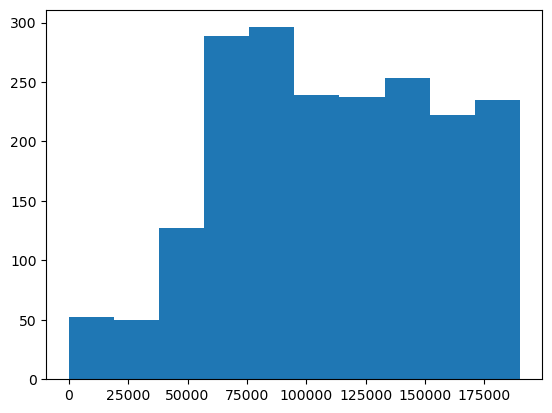

In [36]:
plt.hist(test_df)
plt.show()

In [37]:
normalized_df=(test_df-test_df.mean())/test_df.std()
print(normalized_df)

0      -2.092978
1      -1.655719
2      -0.540710
3      -1.131009
4      -1.590130
          ...   
1995    1.610318
1996   -0.821474
1997   -0.432248
1998    1.560514
1999   -0.002663
Name: Annual Income ($), Length: 2000, dtype: float64


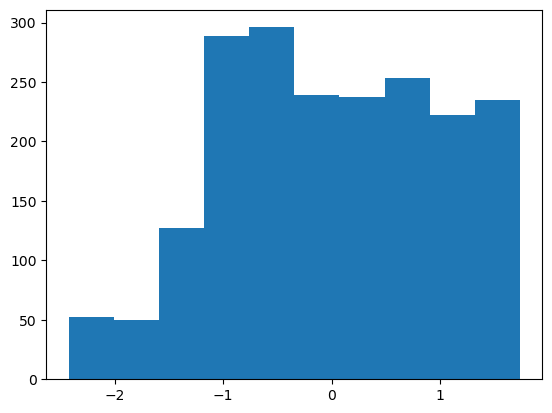

In [38]:
plt.hist(normalized_df)
plt.show()

In [39]:
df.update(normalized_df)

In [40]:
df['Gender'].replace(['Male','Female'],[0,1], inplace=True)

In [41]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,-2.092978,39,Healthcare,1,4
1,2,0,21,-1.655719,81,Engineer,3,3
2,3,1,20,-0.540710,6,Engineer,1,1
3,4,1,23,-1.131009,77,Lawyer,0,2
4,5,1,31,-1.590130,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,1,71,1.610318,40,Artist,8,7
1996,1997,1,91,-0.821474,32,Doctor,7,7
1997,1998,0,87,-0.432248,14,Healthcare,9,2
1998,1999,0,77,1.560514,4,Executive,7,2
